In [1]:
%config Completer.use_jedi = False
import os, mne
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from datetime import datetime
from tqdm import tqdm
import json
from copy import deepcopy

plt.rc('text', usetex=True) 

font = {'family' : 'serif',
        'size'   : '20',
        'serif' : ['Computer Modern'],
        'sans-serif' : ['Computer Modern']}  

plt.rc('font', **font)
plt.rc('axes', titlesize=28, labelsize=20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)  

save_dir = 'C:/Users/andersgm/Documents/Courses/02466 Project work F21/Project/Plots/'

#sns.set_style("whitegrid")

In [2]:
#01_tcp_ar

### Patient Statistics

In [3]:
edfs = []
for root, dirs, files in os.walk(r"C:\Users\andersgm\Documents\Courses\02466 Project work F21\Project\Experiment\artifact_dataset"):
    for file in files:
        if file.endswith(".edf"):
             edfs.append(root + "\\" + file)


session_lengths = []
sfreqs = []
nchans = []
years = []

for edf in edfs:
    data = mne.io.read_raw_edf(edf, verbose=False)
    if edf.split('\\')[-1] == '00010158_s001_t001.edf': #Fix EDF date mistake
        data.info['meas_date'] = datetime(2013, 1, 1)
    
    session_lengths.append(data.n_times / data.info['sfreq'])
    sfreqs.append(data.info['sfreq'])
    nchans.append(data.info['nchan'])
    years.append(data.info['meas_date'].year)

In [4]:
txts = []
for root, dirs, files in os.walk(r"C:\Users\andersgm\Documents\Courses\02466 Project work F21\Project\Experiment\artifact_dataset"):
    for file in files:
        if file.endswith(".txt"):
             txts.append(root + "\\" + file)

age = []
for txt in txts:
    with open(txt, "rb") as file:
        s = file.read().decode('latin-1').lower()
        try:
            if s.find('year') != -1:
                index = s.find('year')
                age.append(int("".join(filter(str.isdigit, s[index-10: index]))))
            elif s.find('yr') != -1:
                index = s.find('yr')
                age.append(int("".join(filter(str.isdigit, s[index-10: index]))))
            elif s.find('yo ') != -1:
                index = s.find('yo ')
                age.append(int("".join(filter(str.isdigit, s[index-10: index]))))
        except:
            pass

In [5]:
print("Average session length: {:.3f}".format(np.mean(session_lengths)))

Average session length: 1161.084


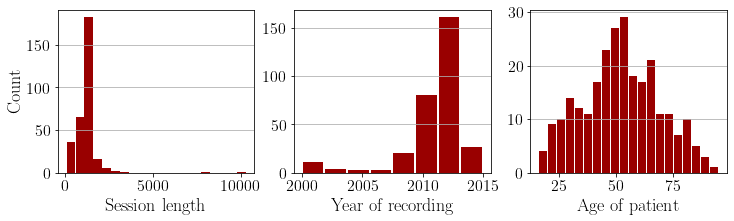

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

ax[0].hist(session_lengths, bins=20, rwidth=0.90, color="#990000")
ax[0].grid(axis='y')
ax[0].set_ylabel(r'{Count}', size=18)
ax[0].set_xlabel(r'{Session length}', size=18)
#ax[0].set_yscale('log')
ax[1].hist(years, bins=8, rwidth=0.90, color="#990000")
ax[1].grid(axis='y')
ax[1].set_xlabel(r'{Year of recording}', size=18)
ax[2].hist(age, bins=20, rwidth=0.90, color="#990000")
ax[2].grid(axis='y')
ax[2].set_xlabel(r'{Age of patient}', size=18)
#plt.tight_layout()
plt.savefig(save_dir + "patient_statistics.png", dpi=1000, bbox_inches = 'tight')
plt.show()

### Artifact Statistics

In [7]:
df = pd.read_pickle(r"C:\Users\andersgm\Documents\Courses\02466 Project work F21\Project\dataframe_float32.pkl")

In [8]:
label_dict = {'chew': 0, 'elpp': 1, 'eyem': 2, 'musc': 3, 'shiv': 4, 'null': 5}

In [9]:
with open(r"C:\Users\andersgm\Documents\Courses\02466 Project work F21\Project\artifacts.json") as file:
    artifacts = json.load(file)

In [10]:
artifact_lengths = [[], [], [], [], [], []]
for patient in artifacts.values():
    for session in patient.values():
        for start, end, label in session:
            artifact_lengths[label_dict[label]].append(end-start)

In [11]:
print([np.mean(lengths) for lengths in artifact_lengths])

[16.070947959183677, 5.685153776435045, 6.179934807149574, 13.429267518248166, 4.256044927536232, 128.0338426829268]


In [12]:
color_dict = {0: "#f5cf40", 1: "#e63f47", 2: "#0ed280", 3: "#fc7323", 4: "#79218f", 5: "#828bf2"} 

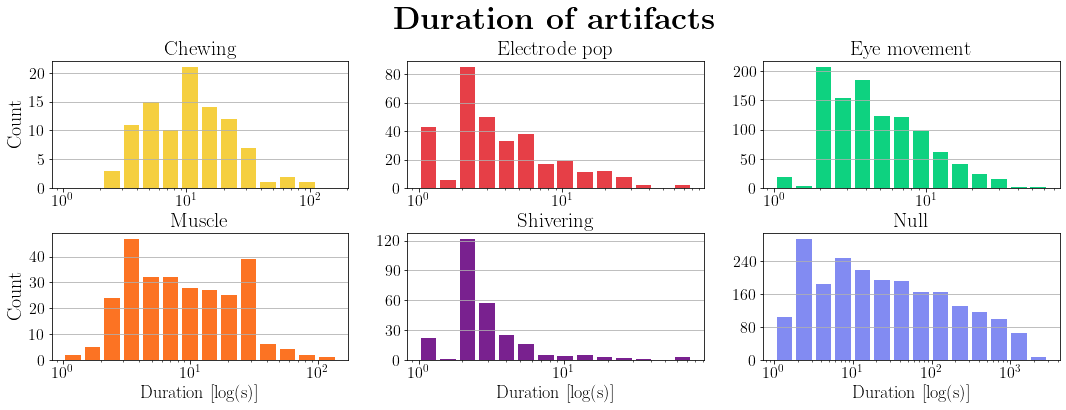

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(14,5))

gen_bins = lambda a, n: np.power(10, np.linspace(0, np.log10(np.max(a)), n))

ax[0,0].hist(artifact_lengths[0], bins=gen_bins(artifact_lengths[0], 15), rwidth=0.80, color=color_dict[0])
ax[0,0].grid(axis='y')
ax[0,0].set_xscale('log')
ax[0,0].set_ylabel('Count')
ax[0,0].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[0,0].title.set_text(r'{\huge {Chewing}')

ax[0,1].hist(artifact_lengths[1], bins=gen_bins(artifact_lengths[1], 15), rwidth=0.80, color=color_dict[1])
ax[0,1].grid(axis='y')
ax[0,1].set_xscale('log')
ax[0,1].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[0,1].title.set_text(r'{\huge {Electrode pop}')

ax[0,2].hist(artifact_lengths[2], bins=gen_bins(artifact_lengths[2], 15), rwidth=0.80, color=color_dict[2])
ax[0,2].grid(axis='y')
ax[0,2].set_xscale('log')
ax[0,2].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[0,2].title.set_text(r'{\huge {Eye movement}')

ax[1,0].hist(artifact_lengths[3], bins=gen_bins(artifact_lengths[3], 15), rwidth=0.80, color=color_dict[3])
ax[1,0].grid(axis='y')
ax[1,0].set_xscale('log')
ax[1,0].set_ylabel('Count')
ax[1,0].set_xlabel('Duration [log(s)]', size=18)
ax[1,0].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[1,0].title.set_text(r'{\huge {Muscle}')

ax[1,1].hist(artifact_lengths[4], bins=gen_bins(artifact_lengths[4], 15), rwidth=0.80, color=color_dict[4])
ax[1,1].grid(axis='y')
ax[1,1].set_xscale('log')
ax[1,1].set_xlabel('Duration [log(s)]', size=18)
ax[1,1].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[1,1].title.set_text(r'{\huge {Shivering}')


ax[1,2].hist(artifact_lengths[5], bins=gen_bins(artifact_lengths[5], 15), rwidth=0.80, color=color_dict[5])
ax[1,2].grid(axis='y')
ax[1,2].set_xscale('log')
ax[1,2].set_xlabel(r'Duration [log(s)]', size=18)
ax[1,2].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[1,2].title.set_text(r'{\huge {Null}')

fig.suptitle(r"\textbf{Duration of artifacts}", size=32)

plt.subplots_adjust(left=0.0,
                    bottom=0.0, 
                    right=1.0, 
                    top=0.83, 
                    wspace=0.2, 
                    hspace=0.35)

plt.savefig(save_dir + "duration_of_artifacts", dpi=1000)
plt.show()

In [14]:
for i, length in enumerate(artifact_lengths):
    name = list(label_dict.keys())[list(label_dict.values()).index(i)]
    print("{}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(name, np.min(length), np.max(length), np.mean(length), np.median(length)))

chew	2.30	162.11	16.07	10.18
elpp	0.75	80.18	5.69	3.08
eyem	0.86	63.27	6.18	4.19
musc	1.32	140.10	13.43	8.04
shiv	0.92	76.12	4.26	2.16
null	0.11	2973.03	128.03	16.89


In [15]:
patients_with_artifact = np.zeros(6, dtype=int)

for patient_name in tqdm(np.unique(df["Name"])):
    patients_with_artifact[np.unique(df[df['Name'] == patient_name]["Multiclass label"])] += 1                

100%|████████████████████████████████████████████████████████████████████████████████| 302/302 [00:21<00:00, 13.88it/s]


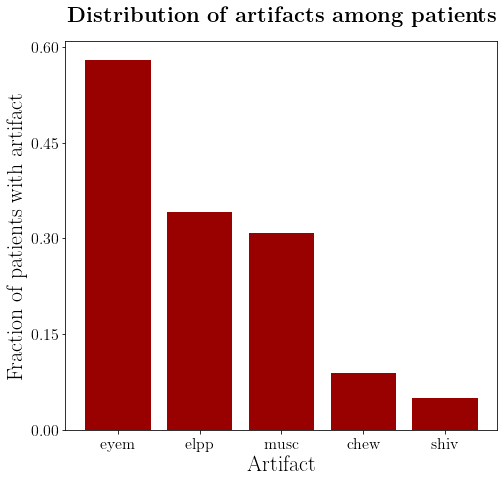

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

mask = np.argsort(patients_with_artifact[:5])[::-1]
names = [list(label_dict.keys())[i] for i in mask]
counts = patients_with_artifact[:5][mask] / len(np.unique(df["Name"]))


ax.bar(names, counts, color="#990000", width=0.8)
ax.set_ylabel('Fraction of patients with artifact', size=22)
ax.set_xlabel('Artifact', size=22)
ax.yaxis.set_major_locator(plt.MaxNLocator(6))
plt.subplots_adjust(left=0.0,
                    bottom=0.0, 
                    right=1.0, 
                    top=0.90, 
                    wspace=0.2, 
                    hspace=0.35)

plt.suptitle(r"\textbf{Distribution of artifacts among patients}", size=22)
plt.show()

In [17]:
hex_to_rgb = lambda s: [int(s[1:3], 16), int(s[3:5], 16), int(s[5:7], 16)] 

In [18]:
def plot_artifacts(ax, y, dataframe):
    image = []
    for label in y:
        image.append(hex_to_rgb(color_dict[label]))
    image = np.array(image)
    image = np.expand_dims(image, 0)
    image = np.tile(np.repeat(image, 2, axis=1), (1, 1, 1))
    ax.set_yticks([])
    ax.imshow(image, interpolation='none', extent=(0, len(y)/4, 0, len(y)/4*(1/10)))
    

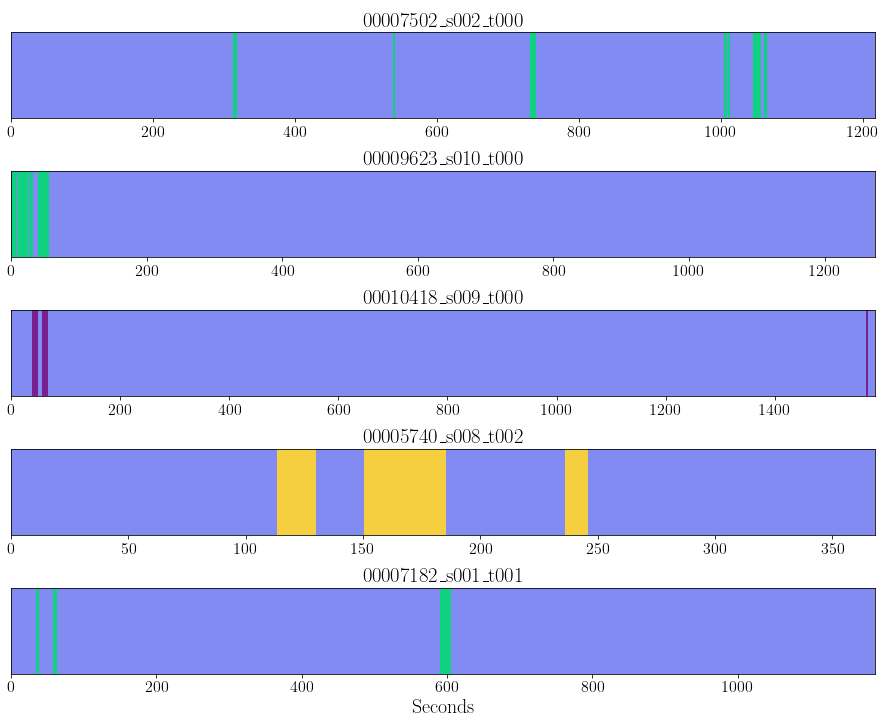

In [19]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,10))

for i, patient_name in enumerate(np.random.choice(np.unique(df["Name"]), 5)):
    patient = deepcopy(df[df["Name"] == patient_name])
    patient = patient.sort_values(by="Start", ascending=True, key=lambda col: col.values).reset_index(drop=True)
    plot_artifacts(ax[i], patient["Multiclass label"], patient)
    ax[i].title.set_text("{\\huge %s" % (patient_name.replace("_", "\\_")))

ax[4].set_xlabel("Seconds")    
plt.subplots_adjust(left=0.0,
                    bottom=0.0, 
                    right=1.0, 
                    top=0.90, 
                    wspace=0.4, 
                    hspace=0.5)
plt.show()

In [20]:
artifact_windows = [np.stack(df[df["Multiclass label"] == i]["Window"].values) for i in range(6)]

In [21]:
artifact_names = ['Chewing', 'Electrode Pop', 'Eye Movement', 'Muscle', 'Shivering', 'Null']

In [22]:
        for a in ax.flat:
            a.label_outer()
        fig.suptitle(artifact_names[i])

        fig.subplots_adjust(right=0.85)
        cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
        fig.colorbar(im, cax=cbar_ax)

        fig.show()

NameError: name 'im' is not defined

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=6, sharex=True, sharey=True, figsize=(16, 6))
for i, artifact in enumerate(artifact_windows):
    ax[0,i].title.set_text("{\huge %s}" % artifact_names[i])
    for row in range(3):
        idx = np.random.choice(len(artifact))
        x = np.reshape(artifact[idx], (19, 25))
        im = ax[row, i].imshow(x, cmap="magma")
        im.set_clim(-2,2)
        ax[row, i].set_xticks([])

plt.show()

In [ ]:
fig, ax = plt.subplots(2, 3, sharey=True, sharex=True, figsize=(16,8))
fig.tight_layout()

electrode_names = ['Fp1', 'F7', 'T3', 'T5', 'F3', 'C3', 'P3', 'O1', 'Cz', 'Fp2', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'A1', 'A2']

for i, artifact in enumerate(artifact_windows):
    x = np.mean(artifact, axis=0)

    im = ax[i % 2, i % 3].imshow(x, cmap="magma")
    im.set_clim(-1, 1)
    ax[i % 2, i % 3].set_title(artifact_names[i])

    #if i == 5:
    #    ax[i % 2, i % 3].set_visible(False)

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.05)
plt.show()